In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rich import print as pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pydantic import BaseModel
import networkx as nx

from quantumion.analog.operator import PauliX, PauliY, PauliZ, PauliI, Creation, Annihilation
from quantumion.analog.circuit import AnalogCircuit
from quantumion.analog.gate import AnalogGate
from quantumion.analog.math import tensor, prod, sum
from quantumion.utils.io import IO

from backends.task import Task, TaskArgsAnalog
from backends.analog.julia.quantumoptics import QuantumOpticsBackend
from backends.analog.python.qutip import QutipBackend

In [3]:
class BenchmarkArgs(BaseModel):
    n_runs: int = 4

In [4]:
def graph_to_operator(g):
    ops = []
    for edge in g.edges:
        op = tensor([PauliZ if i in edge else PauliI for i in range(n_qreg)])
        ops.append(op)
    return ops

In [5]:
def setup(n_qreg: int):
    gz = nx.grid_graph((n_qreg,), periodic=True)
    ops = graph_to_operator(gz)

    ex = AnalogCircuit()
    gate = AnalogGate(
        duration=1.0,
        unitary=ops,
        dissipation=[]
    )
    ex.add(gate=gate)

    args = TaskArgsAnalog(
        n_shots=100,
        fock_cutoff=4,
        # observables={'z': PauliZ},
        dt=0.01
    )

    task = Task(program=ex, args=args)
    return task

In [6]:
io = IO(folder='analog-benchmark', include_date=True)

In [7]:
backends = [QutipBackend(), QuantumOpticsBackend()]
args = BenchmarkArgs(n_runs=4)

In [8]:
n_qregs = (1, 2, 4, 6, 8, 10, 12, 13, 14, 15)
_d = []
for n_qreg in n_qregs:
    task = setup(n_qreg)
    for backend in backends:
        for run in range(args.n_runs):
            print(f"{n_qreg} | {backend.name} | {run}")
            result = backend.run(task)
            _d.append(dict(name=backend.name, run=run, runtime=result.runtime, n_qreg=n_qreg))
pprint(task)
df = pd.DataFrame(_d)
d = df[df.run > 0]

1 | qutip | 0
1 | qutip | 1
1 | qutip | 2
1 | qutip | 3
1 | quantumoptics | 0
1 | quantumoptics | 1
1 | quantumoptics | 2
1 | quantumoptics | 3
2 | qutip | 0
2 | qutip | 1
2 | qutip | 2
2 | qutip | 3
2 | quantumoptics | 0
2 | quantumoptics | 1
2 | quantumoptics | 2
2 | quantumoptics | 3
4 | qutip | 0
4 | qutip | 1
4 | qutip | 2
4 | qutip | 3
4 | quantumoptics | 0
4 | quantumoptics | 1
4 | quantumoptics | 2
4 | quantumoptics | 3
6 | qutip | 0
6 | qutip | 1
6 | qutip | 2
6 | qutip | 3
6 | quantumoptics | 0
6 | quantumoptics | 1
6 | quantumoptics | 2
6 | quantumoptics | 3
8 | qutip | 0
8 | qutip | 1
8 | qutip | 2
8 | qutip | 3
8 | quantumoptics | 0
8 | quantumoptics | 1
8 | quantumoptics | 2
8 | quantumoptics | 3
10 | qutip | 0
10 | qutip | 1
10 | qutip | 2
10 | qutip | 3
10 | quantumoptics | 0
10 | quantumoptics | 1
10 | quantumoptics | 2
10 | quantumoptics | 3
12 | qutip | 0
12 | qutip | 1
12 | qutip | 2
12 | qutip | 3
12 | quantumoptics | 0
12 | quantumoptics | 1
12 | quantumoptics | 2

Task(
    program=AnalogCircuit(
        definitions=[],
        registers=[],
        sequence=[
            AnalogGate(
                duration=1.0,
                unitary=[
                    Operator(
                        coefficient=1.0,
                        qreg=['z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z', 'i'],
                        qmode=[]
                    ),
                    Operator(
                        coefficient=1.0,
                        qreg=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'z', 'z'],
                        qmode=[]
                    )
                ],
                dissipation=[]
            )
        ],
        n_qreg=15,
        n_qmode=0
    ),
    args=TaskArgsAnalog(n_shots=100, fock_cutoff=4, observables={}, dt=0.01)
)

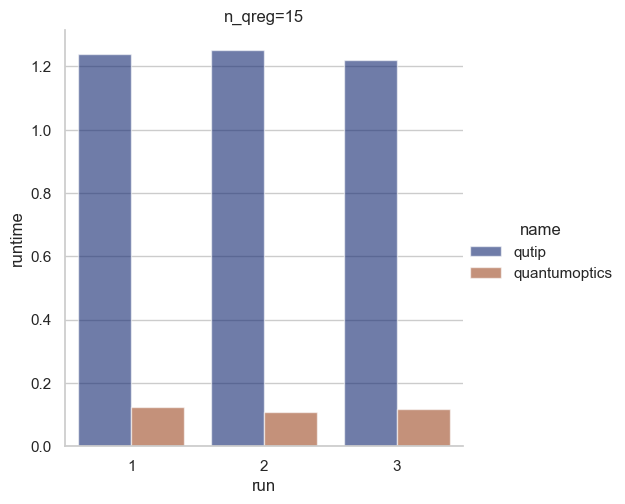

In [9]:
for n_qreg in n_qregs[-1:]:
    sns.set_theme(style="whitegrid")
    d_compiled = d[(d.n_qreg == n_qreg)]
    sns.set_theme(style="whitegrid")
    fig = sns.catplot(d_compiled, x="run", y='runtime', hue='name', kind="bar", palette="dark", alpha=.6)
    fig.set(title=f"n_qreg={n_qreg}")
    plt.show()

08/11/2023, 23:10:45 | Saved figure to /Users/benjamin/data/oqd/2023-11-08_analog-benchmark/qutip-quantumoptics-1dising successfully.


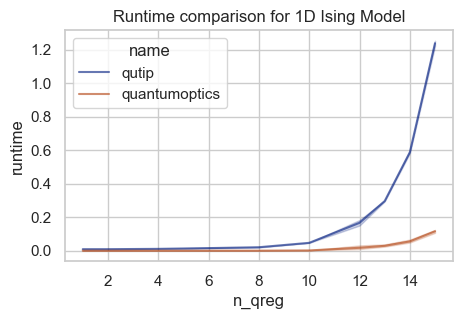

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])
sns.lineplot(d, x="n_qreg", y='runtime', hue='name', palette="dark", alpha=.6, ax=ax)
ax.set(title="Runtime comparison for 1D Ising Model")
io.save_figure(fig, filename="qutip-quantumoptics-1dising")